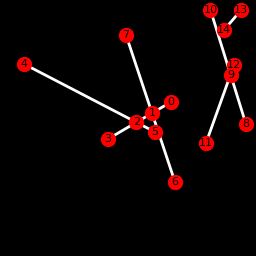

'[(0, 1), (1, 2), (2, 3), (4, 2), (2, 5), (6, 1), (1, 7), (8, 9), (9, 10), (11, 9), (9, 12), (13, 14)]'

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from curve_creation import create_curves, create_nodes
from curve_drawing import draw_curves_and_nodes

size = 256              # Image size
n_control_points = 20   # "complexity" of the curves
max_vd =  0.            # Sets the typical curvature of the curves
num_curves = 6          # Number of curves to generate
extra_space = 16        # Extra space for curve endpoint position
radius = 2              # Radius of each curve
padding = 10             # Image padding

#np.random.seed(0)

curves = create_curves(size, n_control_points, max_vd, num_curves, extra_space, padding)
nodes, edgelist = create_nodes(curves)

img = draw_curves_and_nodes(curves, nodes, curve_width=radius)

display(Image.fromarray(img), edgelist.__str__())